In [4]:
import pandas as pd
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [5]:
data.tail()

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [6]:
data.shape
# 特征：
# TV：对于一个给定市场中单一产品，用于电视上的广告费用（以千为单位）
# Radio：在广播媒体上投资的广告费用
# Newspaper：用于报纸媒体的广告费用

(200, 4)

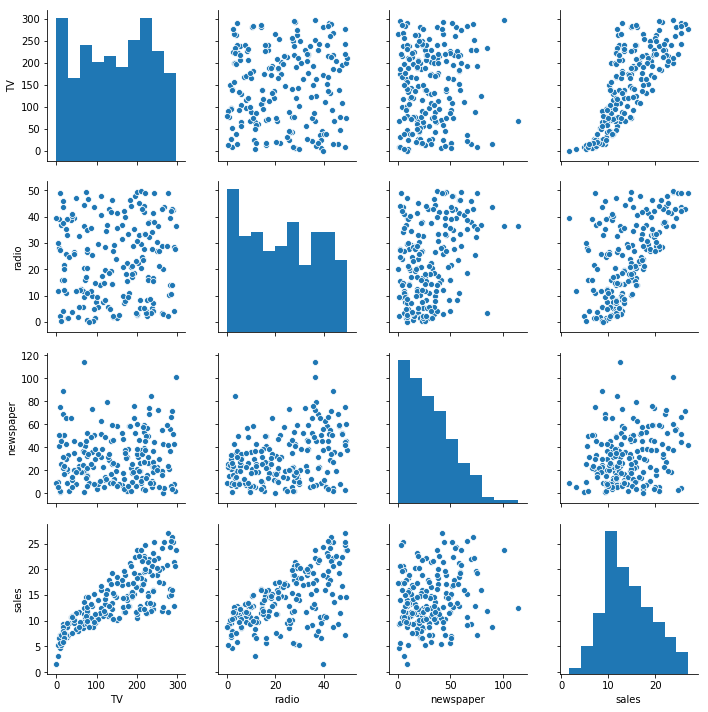

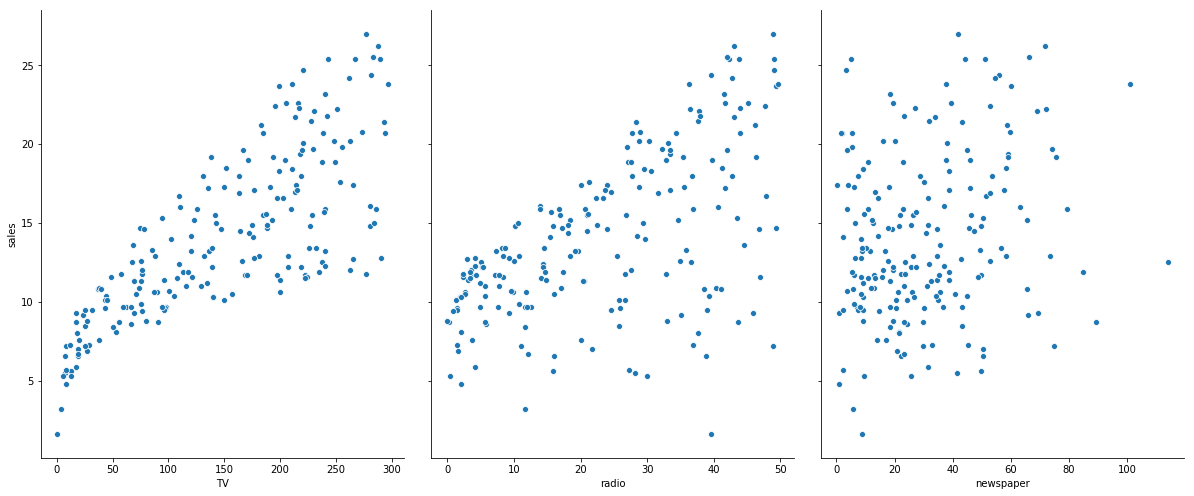

In [7]:
import seaborn as sns
# 省略plt这一个步骤
%matplotlib inline 
# 绘制联合关系的散点图和单变量分布的直方图
sns.pairplot(data)
sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars='sales', height=7, aspect=0.8)

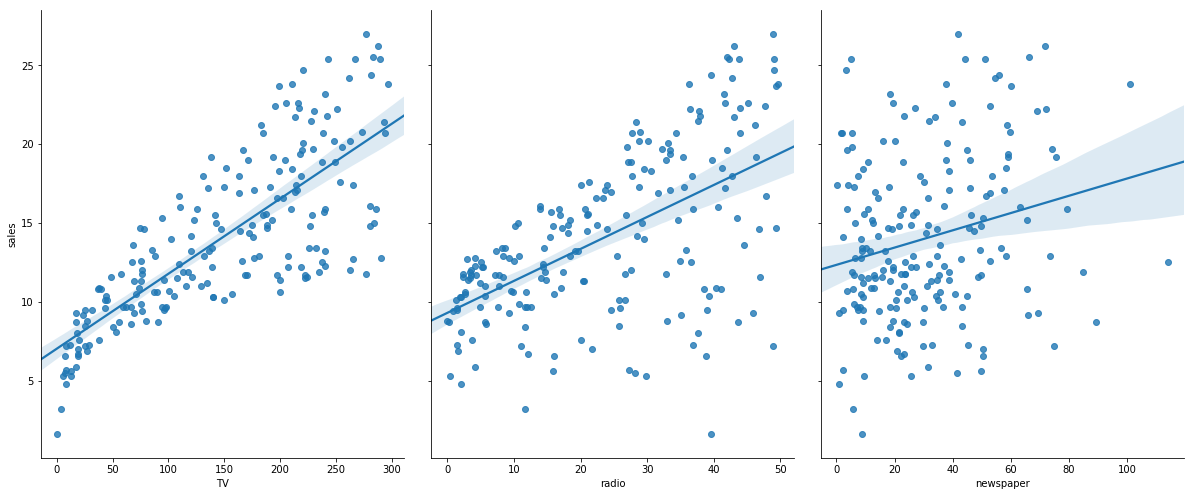

In [9]:
# 使用自带的线性回归拟合并添加一条最佳拟合直线和95%的置信带。
sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars='sales', height=7, aspect=0.8, kind='reg')

In [11]:
all_data = data[['TV', 'radio', 'newspaper']]
all_label = data['sales']

In [14]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_label, test_label = train_test_split(all_data, all_label,test_size=0.25, random_state=1)

In [23]:
print(train_data.shape)
print(train_label.shape)
print(test_data.shape)
print(test_label.shape)

(150, 3)
(150,)
(50, 3)
(50,)


In [24]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(train_data, train_label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
# 打印偏移量
print(linreg.intercept_)
# 打印权重系数
print(linreg.coef_)

2.8769666223179318
[0.04656457 0.17915812 0.00345046]


In [34]:
from sklearn import metrics
import numpy as np
# 打印预测误差 
test_pred = linreg.predict(test_data)
# 平均绝对值误差 Mean Absolute Error, MAE
print(metrics.mean_absolute_error(test_label, test_pred))
# 均方误差 Mean Squared Error, MSE
print(metrics.mean_squared_error(test_label, test_pred))
# 均方根误差 Root Mean Squared Error, RMSE
print(np.sqrt(metrics.mean_squared_error(test_label, test_pred)))

1.0668917082595215
1.9730456202283384
1.4046514230328955


In [35]:
# newspaper的权重系数较小，去除
all_data = data[['TV', 'radio']]
all_label = data['sales']
train_data, test_data, train_label, test_label = train_test_split(all_data, all_label,test_size=0.25, random_state=1)
linreg = LinearRegression()
linreg.fit(train_data, train_label)
# 打印偏移量
print(linreg.intercept_)
# 打印权重系数
print(linreg.coef_)

2.927237320266485
[0.04660234 0.18117959]


In [36]:
# 打印预测误差 
test_pred = linreg.predict(test_data)
# 平均绝对值误差 Mean Absolute Error, MAE
print(metrics.mean_absolute_error(test_label, test_pred))
# 均方误差 Mean Squared Error, MSE
print(metrics.mean_squared_error(test_label, test_pred))
# 均方根误差 Root Mean Squared Error, RMSE
print(np.sqrt(metrics.mean_squared_error(test_label, test_pred)))

1.04775904112126
1.9262760418667424
1.3879034699382888


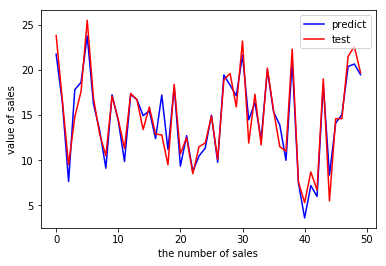

In [37]:
# 三个误差其实都变小，证明newspaper干扰大，去除正确
# 绘制roc曲线
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(len(test_pred)),test_pred,'b',label="predict")
plt.plot(range(len(test_pred)),test_label,'r',label="test")
plt.legend(loc="upper right") #显示图中的标签
plt.xlabel("the number of sales")
plt.ylabel('value of sales')
plt.show()
